In [1]:
using OptimalControl

t0 = 0
tf = 40.0
alpha = 2
σ1 = 1
σ2 = 3
δ1 = 1
δ2 = 10
beta = 3
A0 = 10.0

10.0

Dynamics

Method = (:direct, :adnlp, :ipopt)
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:     2003
Number of nonzeros in inequality constraint Jacobian.:      202
Number of nonzeros in Lagrangian Hessian.............:      505

Total number of variables............................:      404
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      101
                     variables with only upper bounds:        0
Total number of equality constraints.................:      303
Total number of inequality constraints...............:      202
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      202

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.70e-01 5.73e-01   0.

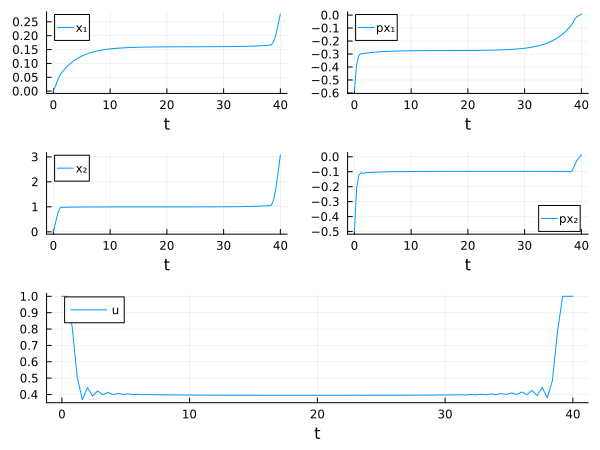

In [2]:
const b = 1
const e = 1
const a1 = 1
const a2 = 3

F11(x1,x2) = begin
    return  (δ1/(1+alpha * A(x1,x2)))
end
F21(x1,x2) = begin
    return  (δ2/(1+ A(x1,x2)))
end
F12(x) = begin
    return  (a1*x)
end;
F22(x) = begin
    return  (a2*x)
end;
G(x1,x2) = begin
    return (1/(1+x1+ beta*x2))
end;

A(x1,x2) = begin
    return A0/(1 + x1/σ1 +x2/σ2)
end;
x0 = [0.0,0.0]
Problem(x0) = begin
    @def ocp begin

        t ∈ [ t0, tf ], time
        x ∈ R², state
        u ∈ R, control
        m1 = x₁
        m2 = x₂

        x(t0) == x0
        -m1(t) ≤ 0.0
        -m2(t) ≤ 0.0
        -1.0 ≤ u(t) ≤ 1.0

        ẋ(t) == [ (1+u(t))/2 * F11(m1(t),m2(t)) - (1 - u(t))/2 * F12(m1(t)) , (1+u(t))/2 * F21(m1(t),m2(t)) - (1 - u(t))/2 * F22(m2(t)) ]

        ∫(u(t)*G(m1(t),m2(t)))  → max

    end;
end;
Problem(x0)
sol = solve(Problem(x0))
plot(sol, size=(600, 450))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*